<a href="https://colab.research.google.com/github/ahmadjumadi/ukk-data-science/blob/master/rencana_proyek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDIKSI CUACA**
**Ahmad Jumadi (SMKN 1 Karawang)**
---
**Tujuan:**
--
Tujuan dari proyek ini adalah untuk mengembangkan model prediktif yang dapat memprediksi cuaca yang menghasilkan output **Hujan** atau **Tidak**, berdasarkan data yang diambil dari referensi kaggle dari [link berikut](https://www.kaggle.com/datasets/ananthr1/weather-prediction?rvi=1)
**Kolom:**
--
Using the Columns :
* precipitation
* temp_max
* temp_min
* wind
* Weather

# Import Library

In [1]:
# Data Processing
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preparation For Modelling
from sklearn.model_selection import train_test_split
#
# test -> data yang tidaak diketuahui oleh modelnya
#

# Model Evaluation
from sklearn.metrics import mean_squared_error #Untuk evaluasi performa model
from sklearn.metrics import mean_absolute_error #Untuk evaluasi performa model
from sklearn.metrics import r2_score #Untuk evaluasi performa model nilainya 0 s.d 1

# Reading Dataset

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# load dataset
# path_file = '/content/drive/MyDrive/data-science/rencana-proyek/1/seattle-weather.csv'
path_file = 'dataset/seattle-weather.csv'
auto_df = pd.read_csv(path_file)
auto_df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


## Examining dataset

In [4]:
# Cek jumlah data
print("Ukuran Dataset : ", auto_df.shape)

Ukuran Dataset :  (1461, 6)


In [5]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [6]:
# Cek data kosong/null
missing_data = pd.DataFrame({'Missing Data':auto_df.isnull().sum(),
                             'Data Percent (%)':((auto_df.isnull().sum()/auto_df.shape[0])*100).round(2),
})
missing_data

,Missing Data,Data Percent (%)
date,0,0.0
precipitation,0,0.0
temp_max,0,0.0
temp_min,0,0.0
wind,0,0.0
weather,0,0.0


##Descriptive Statistics

In [7]:
#Melihat deskriptif statistik pada kolom numerik
auto_df.describe().T

,count,mean,std,min,25%,50%,75%,max
precipitation,1461.0,3.029432,6.680194,0.0,0.0,0.0,2.8,55.9
temp_max,1461.0,16.439083,7.349758,-1.6,10.6,15.6,22.2,35.6
temp_min,1461.0,8.234771,5.023004,-7.1,4.4,8.3,12.2,18.3
wind,1461.0,3.241136,1.437825,0.4,2.2,3.0,4.0,9.5


In [8]:
#Melihat deskriptif statistik pada kolom kategorikal
auto_df.describe(include='object').T

,count,unique,top,freq
date,1461,1461,2012-01-01,1
weather,1461,5,rain,641


##Target Class Balance

In [9]:
# ubah data cuaca, jika cerah = 1 kecuali itu 0
df_target_convert = auto_df.copy()
df_target_convert['is_sunny'] = df_target_convert['weather'].map(lambda x: 1
                                                                 if x == 'sun' or
                                                                 x == 'fog' else 0)
df_target_convert.head()

,date,precipitation,temp_max,temp_min,wind,weather,is_sunny
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,0
1,2012-01-02,10.9,10.6,2.8,4.5,rain,0
2,2012-01-03,0.8,11.7,7.2,2.3,rain,0
3,2012-01-04,20.3,12.2,5.6,4.7,rain,0
4,2012-01-05,1.3,8.9,2.8,6.1,rain,0


In [10]:
df_target_convert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
 6   is_sunny       1461 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 80.0+ KB


In [11]:
df_target_convert.head()

,date,precipitation,temp_max,temp_min,wind,weather,is_sunny
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,0
1,2012-01-02,10.9,10.6,2.8,4.5,rain,0
2,2012-01-03,0.8,11.7,7.2,2.3,rain,0
3,2012-01-04,20.3,12.2,5.6,4.7,rain,0
4,2012-01-05,1.3,8.9,2.8,6.1,rain,0


Text(0.5, 1.0, 'Hujan atau Tidak?')

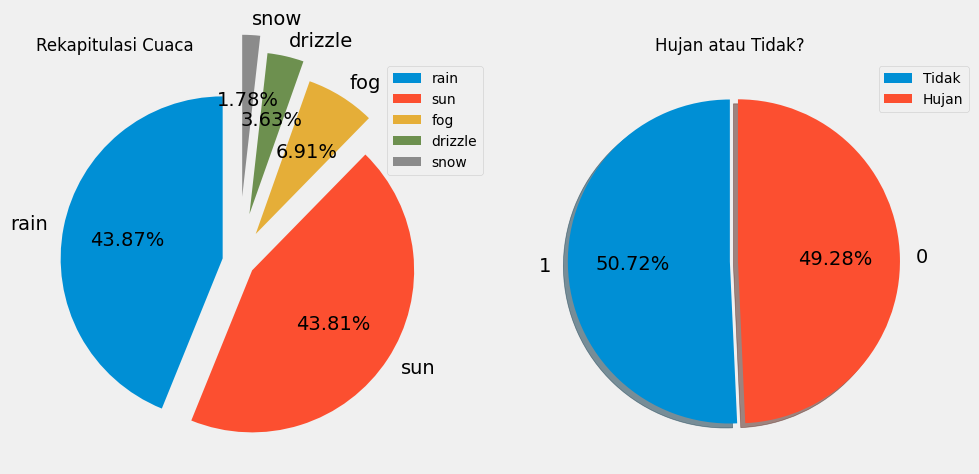

In [12]:
# lets plot pie chart for the columns where we have very few categories
#
plt.rcParams['figure.figsize'] = (16,5)
plt.style.use('fivethirtyeight')
# Rekap Cuaca
labels_weather = auto_df['weather'].value_counts().index
plt.subplot(1, 3, 1)
plt.pie(auto_df['weather'].value_counts(), labels = auto_df['weather'].value_counts().index,
        explode = [0.1, 0.1,0.2,0.3,0.4],
        autopct = '%.2f%%', startangle = 90)
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels_weather,    fontsize=10)
plt.title('Rekapitulasi Cuaca', fontsize = 12, loc='left')

# Hujan Atau Tidak
labels_convert = ['Tidak','Hujan']
plt.subplot(1, 3, 2)
plt.pie(df_target_convert['is_sunny'].value_counts(),
        autopct = '%.2f%%', startangle = 90,
        explode=[0,0.05],
        labels = df_target_convert['is_sunny'].value_counts().index,
        shadow = True)
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels_convert,fontsize=10)
plt.title('Hujan atau Tidak?', fontsize = 12)

In [13]:
# hapus kolom yang tidak dibutuhkan
df_target_convert = df_target_convert.drop(['date','weather'], axis = 1)
df_target_convert.head(10)

,precipitation,temp_max,temp_min,wind,is_sunny
0,0.0,12.8,5.0,4.7,0
1,10.9,10.6,2.8,4.5,0
2,0.8,11.7,7.2,2.3,0
3,20.3,12.2,5.6,4.7,0
4,1.3,8.9,2.8,6.1,0
5,2.5,4.4,2.2,2.2,0
6,0.0,7.2,2.8,2.3,0
7,0.0,10.0,2.8,2.0,1
8,4.3,9.4,5.0,3.4,0
9,1.0,6.1,0.6,3.4,0


# Data Analysis/Visualizations

## Univariate Analysis

In [14]:
def plot_box(x, df):
  plt.figure(figsize = (16, 5))
  plt.style.use('fivethirtyeight')
  sns.boxplot(x=x, data=df)
  plt.title('Persebaran dari kolom {}'.format(x), fontsize=20)
  plt.show()

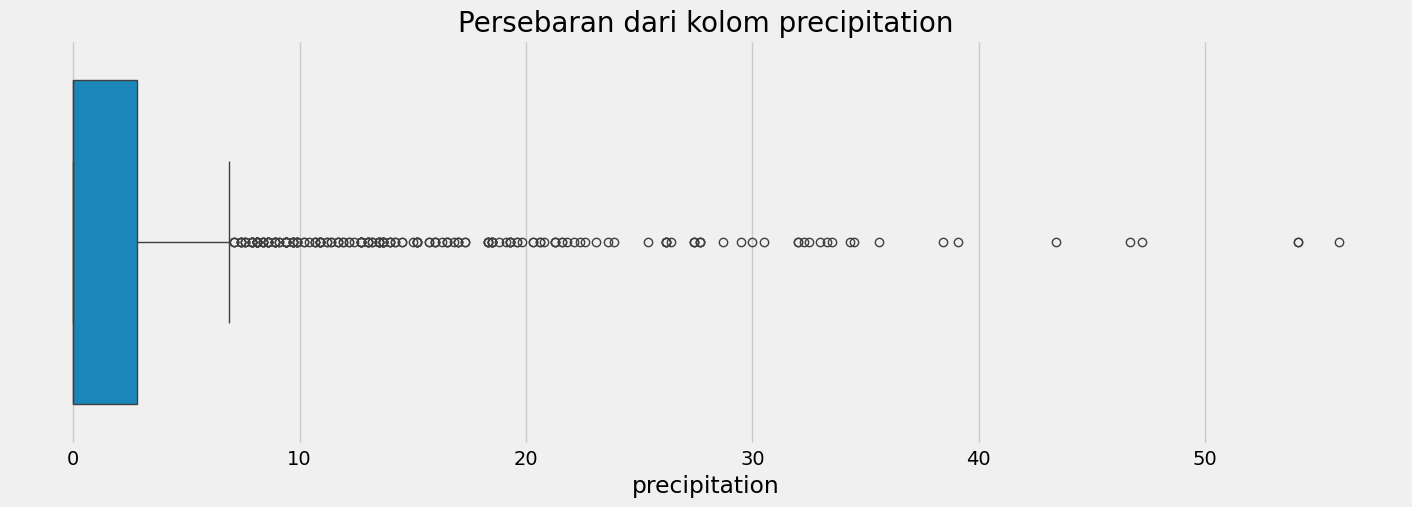

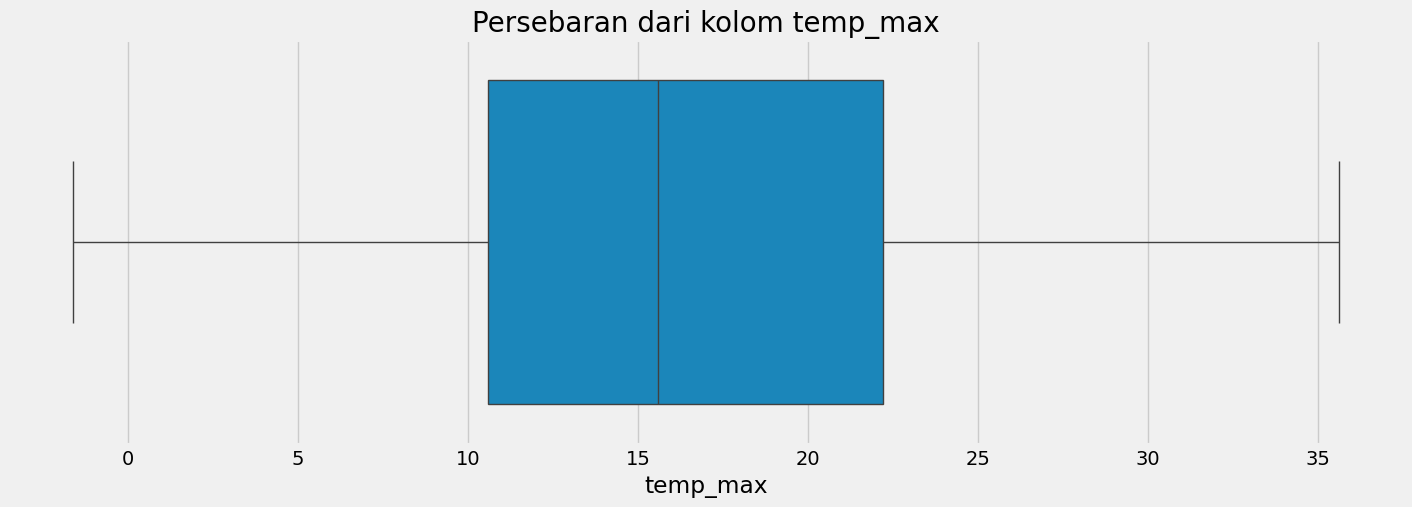

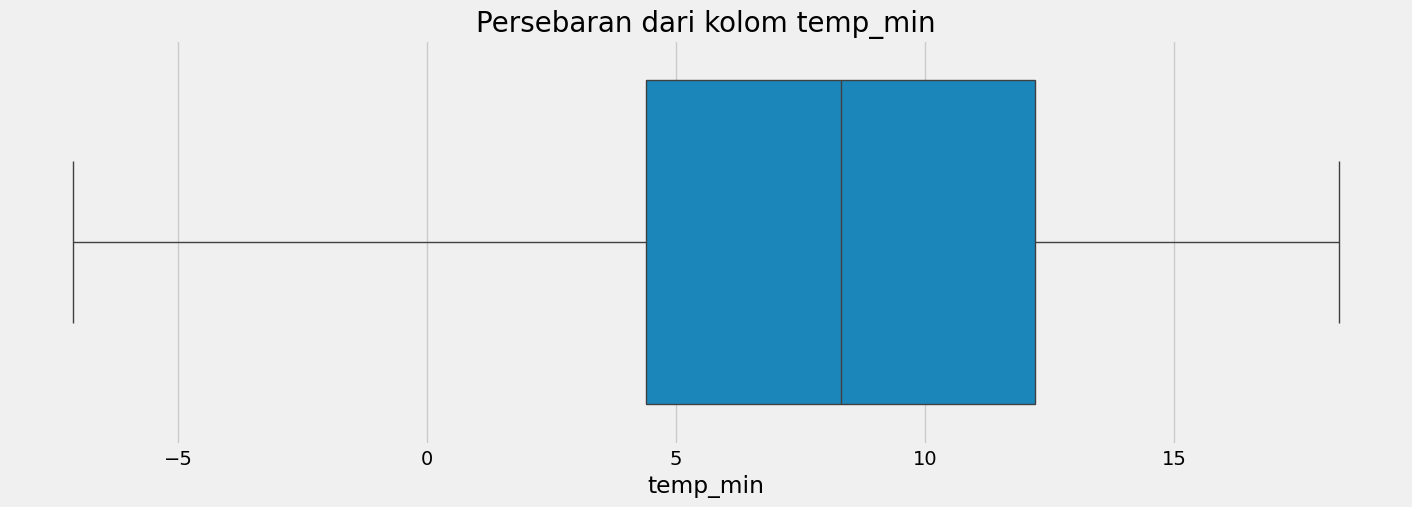

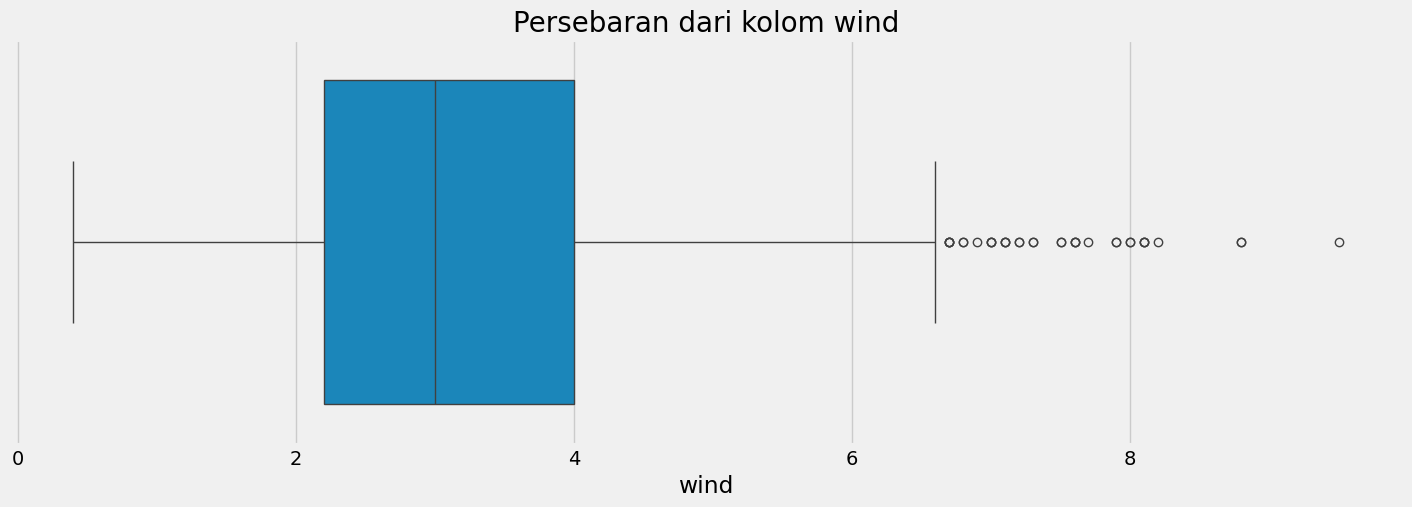

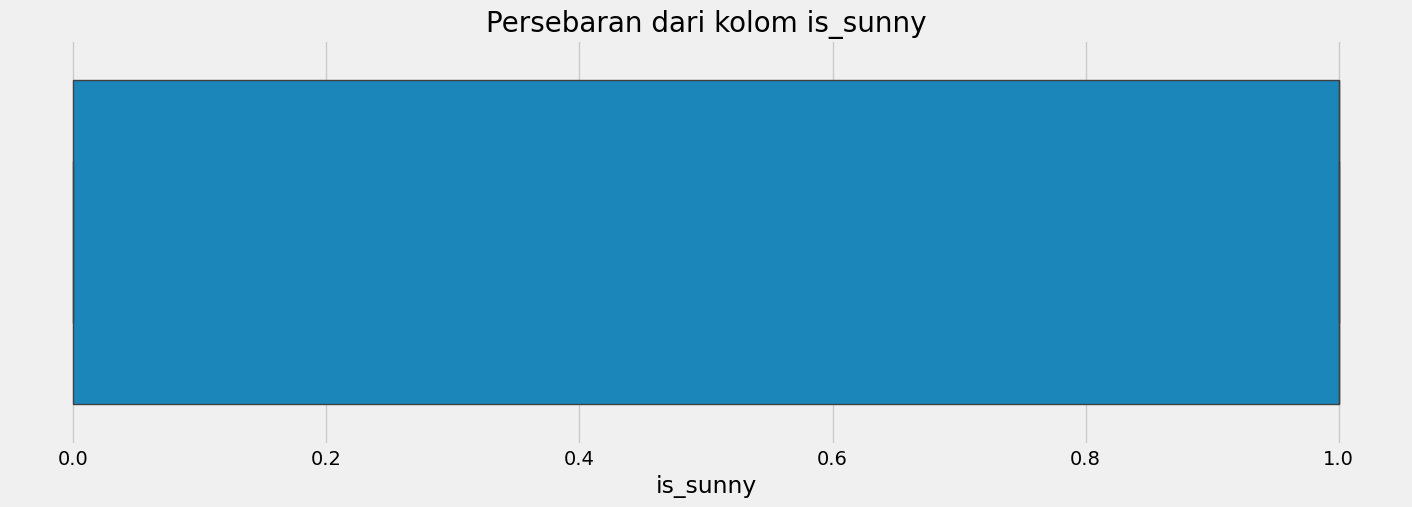

In [15]:
numerical_columns = df_target_convert.select_dtypes(include=['float','int'])
for col in numerical_columns:
  plot_box(str(col), df_target_convert)

## Bivariate Analysis

C:\Users\jmd\AppData\Local\Temp\ipykernel_4084\160341757.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='is_sunny', y='precipitation', data=df_target_convert, palette = 'autumn')


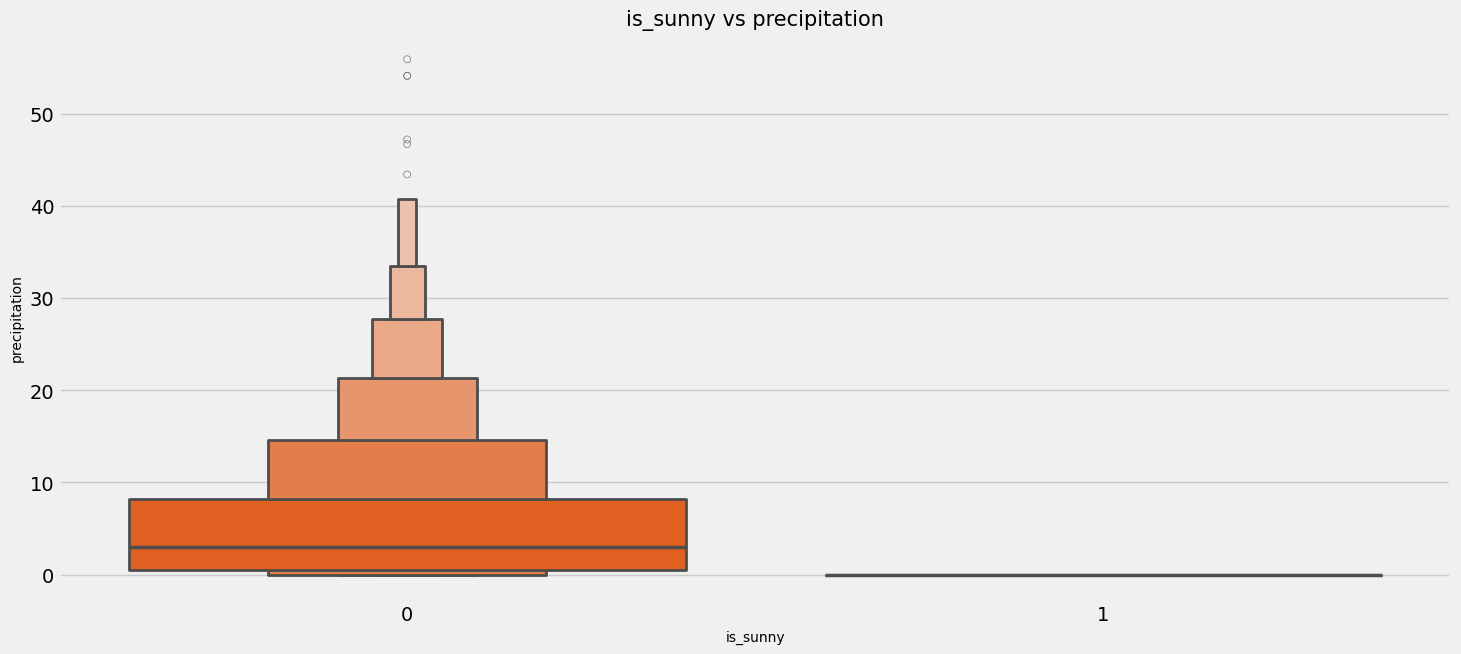

In [16]:
# precipitation Vs is_sunny
plt.rcParams['figure.figsize'] = (16, 7)
sns.boxenplot(x='is_sunny', y='precipitation', data=df_target_convert, palette = 'autumn')
plt.title('is_sunny vs precipitation', fontsize = 15)
plt.xlabel('is_sunny', fontsize = 10)
plt.ylabel('precipitation', fontsize = 10)
plt.show()

C:\Users\jmd\AppData\Local\Temp\ipykernel_4084\1673056883.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='is_sunny', y='temp_max', data=df_target_convert, palette = 'autumn')


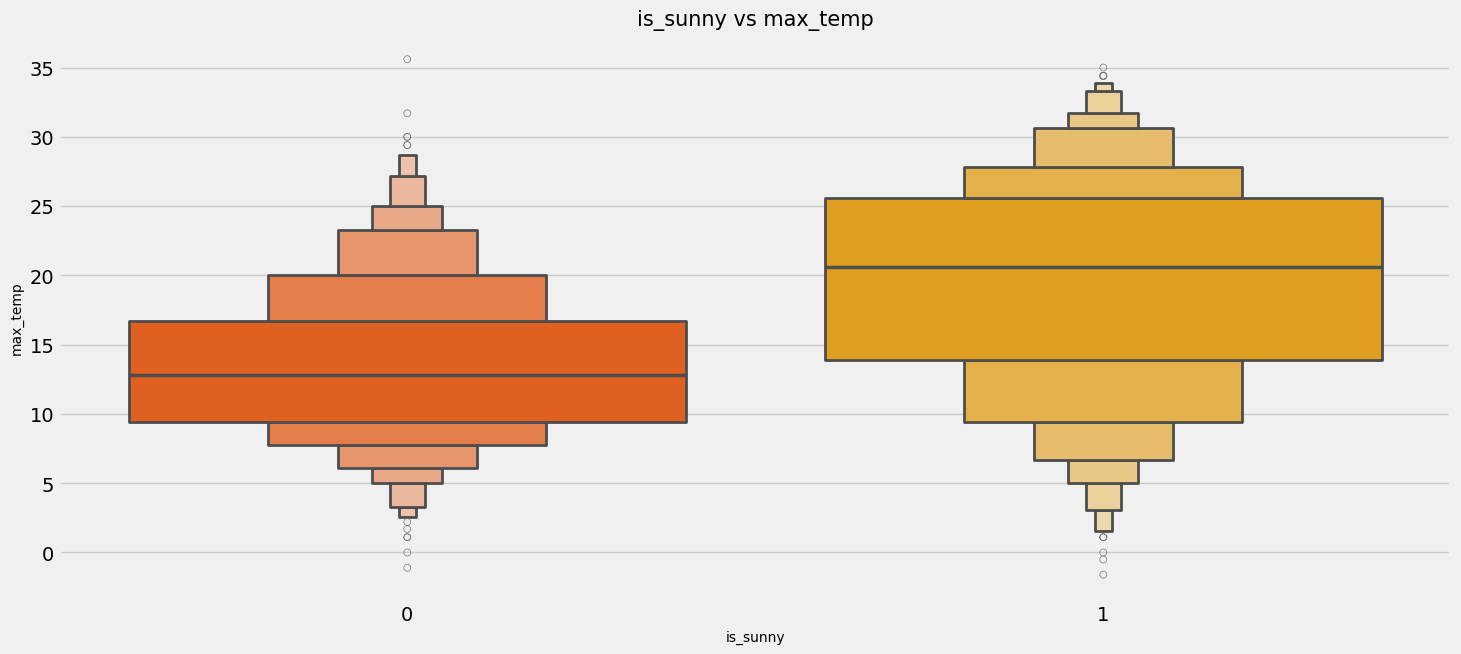

In [17]:
# temp_max Vs is_sunny
plt.rcParams['figure.figsize'] = (16, 7)
sns.boxenplot(x='is_sunny', y='temp_max', data=df_target_convert, palette = 'autumn')
plt.title('is_sunny vs max_temp', fontsize = 15)
plt.xlabel('is_sunny', fontsize = 10)
plt.ylabel('max_temp', fontsize = 10)
plt.show()

C:\Users\jmd\AppData\Local\Temp\ipykernel_4084\4238918847.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='is_sunny', y='temp_min', data=df_target_convert, palette = 'autumn')


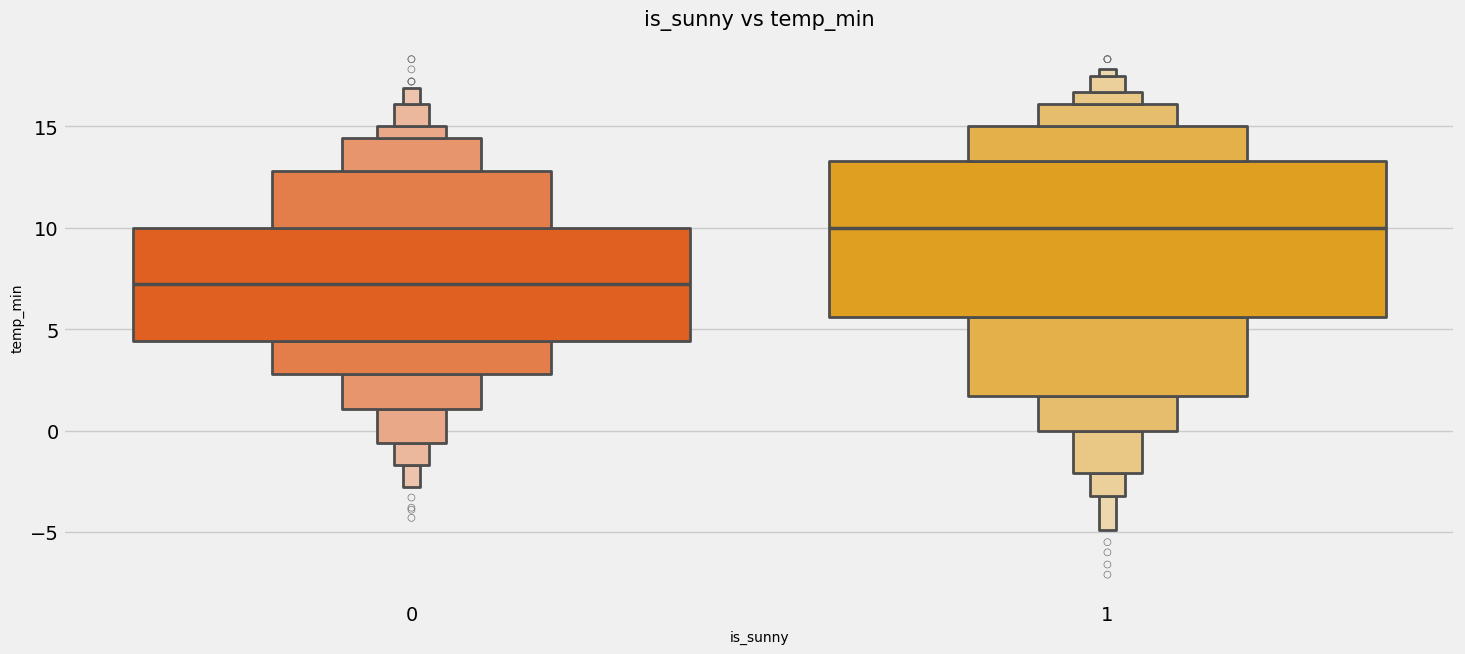

In [18]:
# temp_min Vs is_sunny
plt.rcParams['figure.figsize'] = (16,7)
sns.boxenplot(x='is_sunny', y='temp_min', data=df_target_convert, palette = 'autumn')
plt.title('is_sunny vs temp_min', fontsize = 15)
plt.xlabel('is_sunny', fontsize = 10)
plt.ylabel('temp_min', fontsize = 10)
plt.show()

C:\Users\jmd\AppData\Local\Temp\ipykernel_4084\4029857960.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='is_sunny', y='wind', data=df_target_convert, palette = 'autumn')


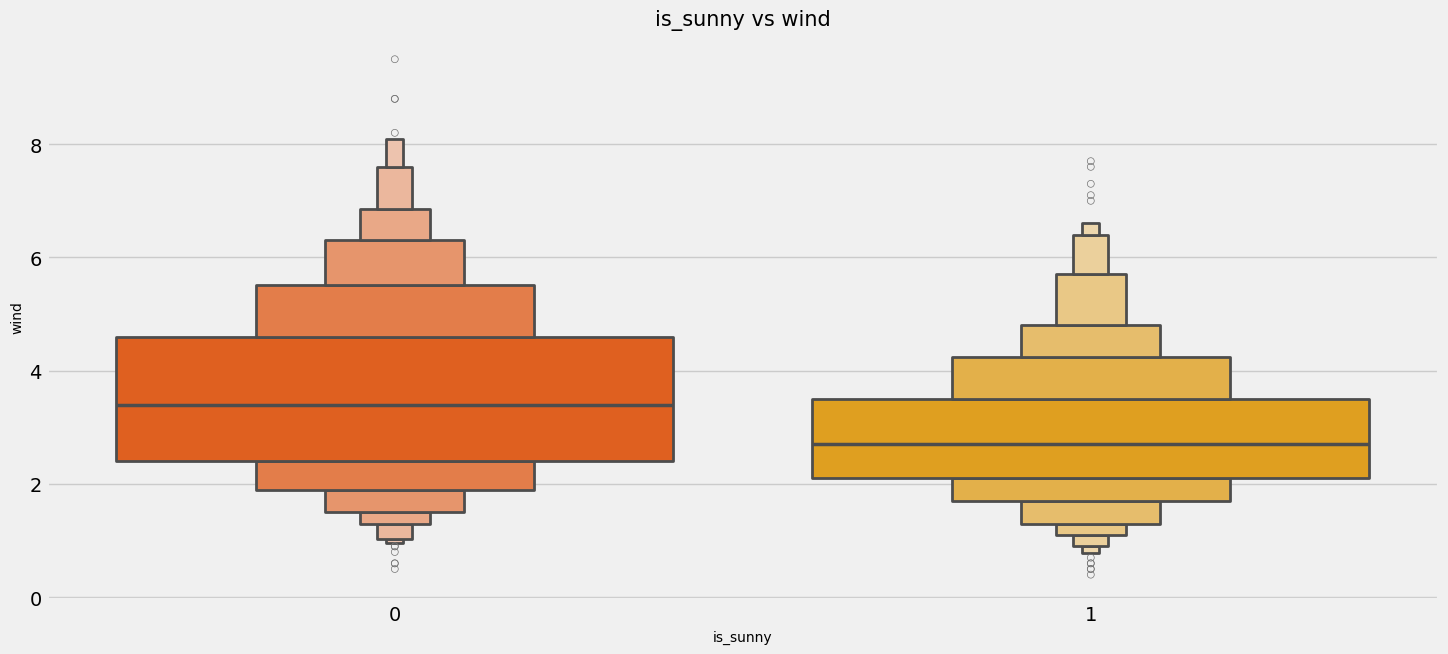

In [19]:
# wind  Vs weather
plt.rcParams['figure.figsize'] = (16,7)
sns.boxenplot(x='is_sunny', y='wind', data=df_target_convert, palette = 'autumn')
plt.title('is_sunny vs wind', fontsize = 15)
plt.xlabel('is_sunny', fontsize = 10)
plt.ylabel('wind', fontsize = 10)
plt.show()

## Multivariate Analysis

In [20]:
df_target_convert.head(1)

,precipitation,temp_max,temp_min,wind,is_sunny
0,0.0,12.8,5.0,4.7,0


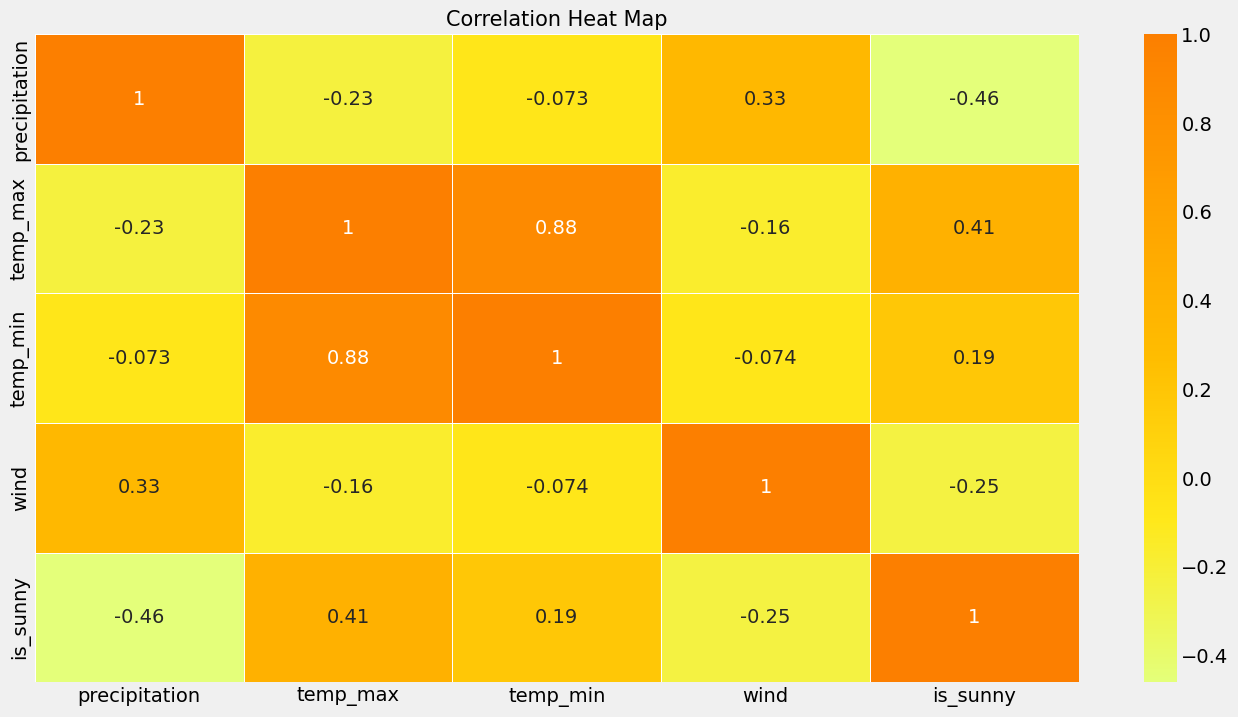

In [21]:
# lets check the Heat Map for the Data with respect to correlation.

plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(df_target_convert.corr(), annot = True, linewidth = 0.5, cmap = 'Wistia')
plt.title('Correlation Heat Map', fontsize = 15)
plt.show()

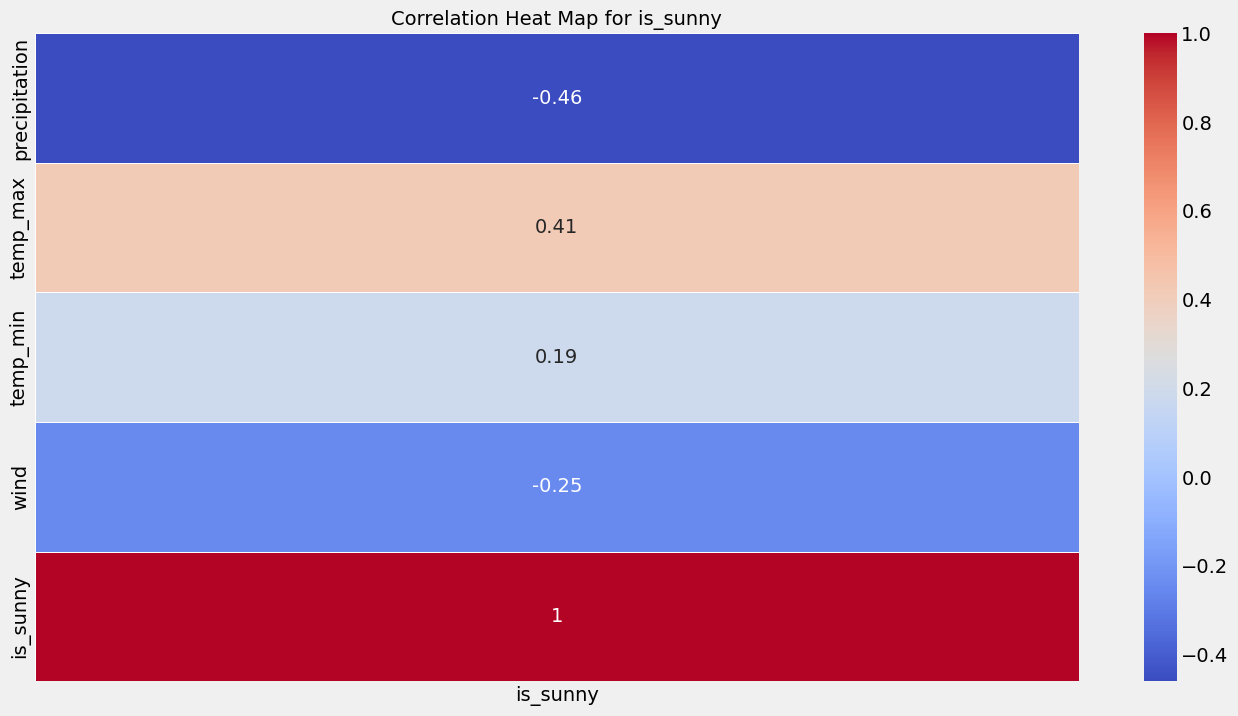

In [22]:
sunny_correlation = df_target_convert.corr()['is_sunny']

# Create a DataFrame with 'price' correlation values
sunny_correlation_df = pd.DataFrame(sunny_correlation)

# Create a heatmap for 'price' correlation
sns.heatmap(sunny_correlation_df, annot=True, linewidth=0.5, cmap='coolwarm')
plt.title('Correlation Heat Map for is_sunny', fontsize=14)
plt.show()

#Data Preprocessing for Model

## Feature Engineering


In [24]:
df_features = df_target_convert.drop(['is_sunny'], axis=1)
df_features.head()

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1


In [25]:
df_target = df_target_convert['is_sunny']
df_target.head()

0    0
1    0
2    0
3    0
4    0
Name: is_sunny, dtype: int64

In [26]:
# tampilkan data dengan kondisi tertentu
auto_df[(auto_df['precipitation'] > 1) & (auto_df['temp_max'] <= 5.8) & (auto_df['temp_min'] > 0.0) & (auto_df['wind'] > 4)]

,date,precipitation,temp_max,temp_min,wind,weather
13,2012-01-14,4.1,4.4,0.6,5.3,snow
72,2012-03-13,9.4,5.6,0.6,5.3,snow
349,2012-12-15,5.3,4.4,0.6,5.1,snow
352,2012-12-18,3.3,3.9,0.6,5.3,snow
359,2012-12-25,13.5,5.6,2.8,4.2,snow
392,2013-01-27,1.8,5.6,3.9,4.5,rain
1450,2015-12-21,27.4,5.6,2.8,4.3,rain
1452,2015-12-23,6.1,5.0,2.8,7.6,rain
1453,2015-12-24,2.5,5.6,2.2,4.3,rain


## Data Splitting

In [27]:
# Split the data into training and test sets
X_train_temp, X_test, y_train_temp, y_test = train_test_split(
    df_features, df_target,
    test_size=0.25,
    random_state=0
)

# Split the temporary data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_temp, y_train_temp,
    test_size=0.25,  # 0.25 x 0.8 = 0.2 (20% for validation)
    random_state=42
)

# Print the shapes of the sets
print('Training Shape  = ', X_train.shape, y_train.shape)
print('Validation Shape= ', X_valid.shape, y_valid.shape)
print('Testing Shape   = ', X_test.shape, y_test.shape)

Training Shape  =  (821, 4) (821,)
Validation Shape=  (274, 4) (274,)
Testing Shape   =  (366, 4) (366,)


## Normalization

In [28]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train[X_train.columns] = sc.fit_transform(X_train[X_train.columns])
X_valid[X_valid.columns] = sc.fit_transform(X_valid[X_valid.columns])
X_test[X_test.columns] = sc.fit_transform(X_test[X_test.columns])

In [29]:
import joblib

#Export Model RandomForest
# path_file = '/content/drive/MyDrive/data-science/rencana-proyek/1/scaller.joblib'
path_file = 'scaller/scaller.joblib'
joblib.dump(sc,path_file)

['scaller/scaller.joblib']

In [30]:
X_train.head()

,precipitation,temp_max,temp_min,wind
1072,0.815926,-0.255748,0.153646,0.618201
559,-0.452909,1.299774,0.577138,-0.117562
495,-0.452909,1.299774,0.249894,-1.522202
189,-0.452909,1.592265,1.212377,-0.318225
257,-0.452909,1.299774,0.577138,-1.187764


# Data Modeling

### Decision Treee

In [31]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=50) #memanggil model
dt.fit(X_train, y_train) #train dengan data train
dt.score(X_train, y_train) #cek akurasi training

0.997563946406821

In [32]:
#contoh model decision tree simpel untuk visualisasi model decision tree
dt1 = DecisionTreeClassifier(max_depth=4)
dt1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [34]:
# import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(dt1, out_file=None,
                                feature_names=X_train.columns,
                                class_names=['Tidak','Hujan'],
                                filled=True)
# graph = graphviz.Source(dot_data, format="png")
# graph

In [35]:
dt_predict = dt.predict(X_valid)

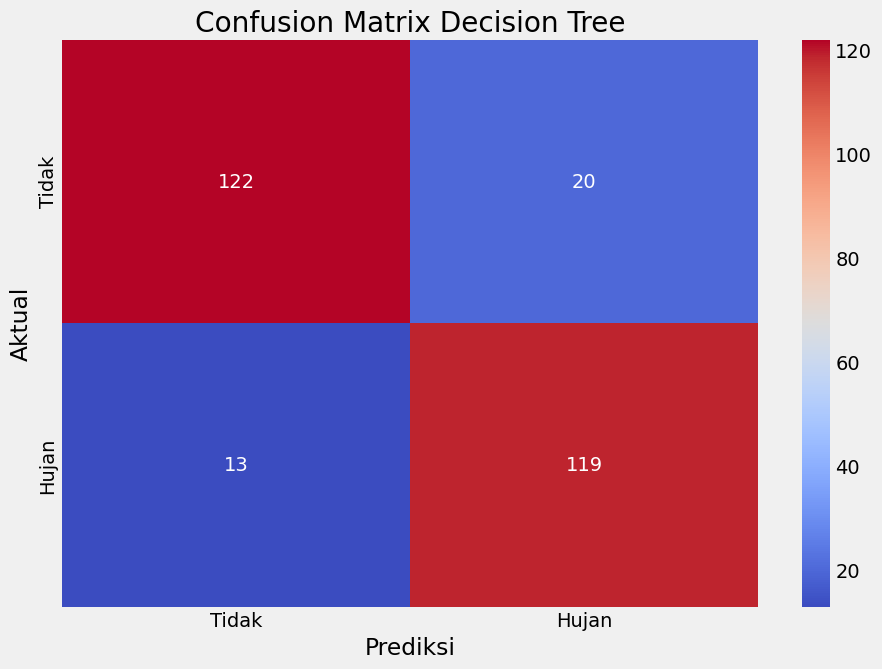

In [36]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_valid,dt_predict)

plt.figure(figsize = (10, 7))
sns.heatmap(cm,annot=True,cmap='coolwarm',fmt='g')
plt.xticks([0.5, 1.5],['Tidak','Hujan'])
plt.yticks([0.5, 1.5],['Tidak','Hujan'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision Tree')
plt.show()

In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_valid,dt_predict))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       142
           1       0.86      0.90      0.88       132

    accuracy                           0.88       274
   macro avg       0.88      0.88      0.88       274
weighted avg       0.88      0.88      0.88       274



### Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier() #memanggil model
rf.fit(X_train, y_train) #training model
rf.score(X_train, y_train) #cek akurasi training model

0.997563946406821

In [39]:
rf_predict = rf.predict(X_valid)

In [40]:
rf.score(X_valid, y_valid)

0.9197080291970803

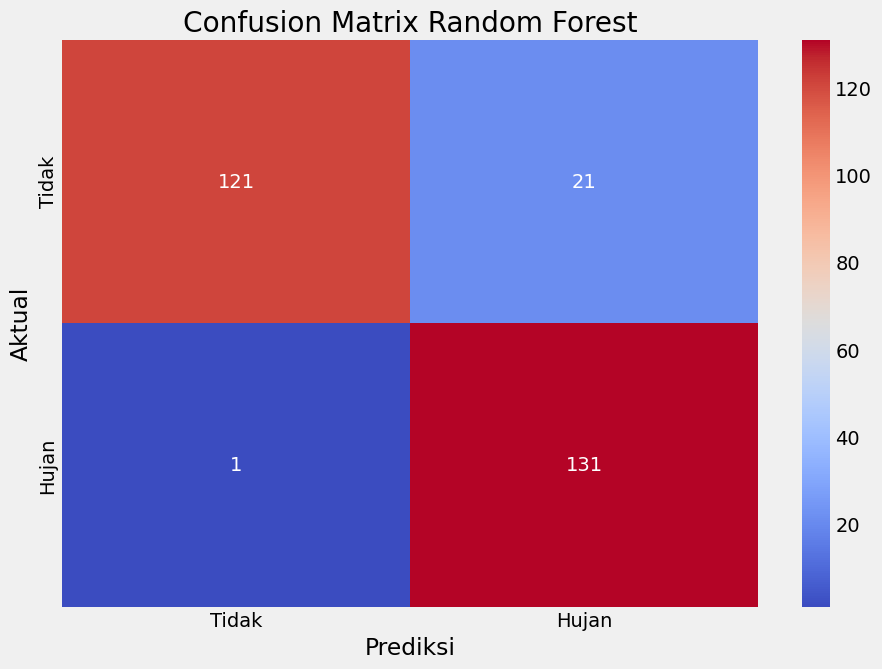

In [41]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_valid,rf_predict)

plt.figure(figsize = (10, 7))
sns.heatmap(cm,annot=True,cmap='coolwarm',fmt='g')
plt.xticks([0.5, 1.5],['Tidak','Hujan'])
plt.yticks([0.5, 1.5],['Tidak','Hujan'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Random Forest')
plt.show()

In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_valid,rf_predict))

              precision    recall  f1-score   support

           0       0.99      0.85      0.92       142
           1       0.86      0.99      0.92       132

    accuracy                           0.92       274
   macro avg       0.93      0.92      0.92       274
weighted avg       0.93      0.92      0.92       274



### Model Comparison

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('----------Accuracy----------')
print('Decision Tree       : {:.2f}%'.format(accuracy_score(y_valid, dt_predict)*100))
print('Random Forest       : {:.2f}%'.format(accuracy_score(y_valid, rf_predict)*100))
print('============================')
print('---------Precision----------')
print('Decision Tree       : {:.2f}%'.format(precision_score(y_valid, dt_predict)*100))
print('Random Forest       : {:.2f}%'.format(precision_score(y_valid, rf_predict)*100))
print('============================')
print('-----------Recall-----------')
print('Decision Tree       : {:.2f}%'.format(recall_score(y_valid, dt_predict)*100))
print('Random Forest       : {:.2f}%'.format(recall_score(y_valid, rf_predict)*100))
print('============================')
# Karena hasil dari Precision dan recall tidak seimbang maka dicari f1_score
print('-----------f1_score-----------')
print('Decision Tree       : {:.2f}%'.format(f1_score(y_valid, dt_predict)*100))
print('Random Forest       : {:.2f}%'.format(f1_score(y_valid, rf_predict)*100))

----------Accuracy----------
Decision Tree       : 87.96%
Random Forest       : 91.97%
---------Precision----------
Decision Tree       : 85.61%
Random Forest       : 86.18%
-----------Recall-----------
Decision Tree       : 90.15%
Random Forest       : 99.24%
-----------f1_score-----------
Decision Tree       : 87.82%
Random Forest       : 92.25%


Dari model yang telah dibuat, model Random Forest masih menggungguli model yang lainnya dalam Accuracy, Precision dan Recall, jadi Random Forest dapat disimpulkan sebagai model terbaik untuk melakukan klasifikasi pada dataset ini

In [44]:
rf.feature_importances_

array([0.70008731, 0.13074192, 0.08138878, 0.08778199])

In [45]:
X_train.columns.values

array(['precipitation', 'temp_max', 'temp_min', 'wind'], dtype=object)

Text(0.5, 1.0, 'Random Forest Feature Importance')

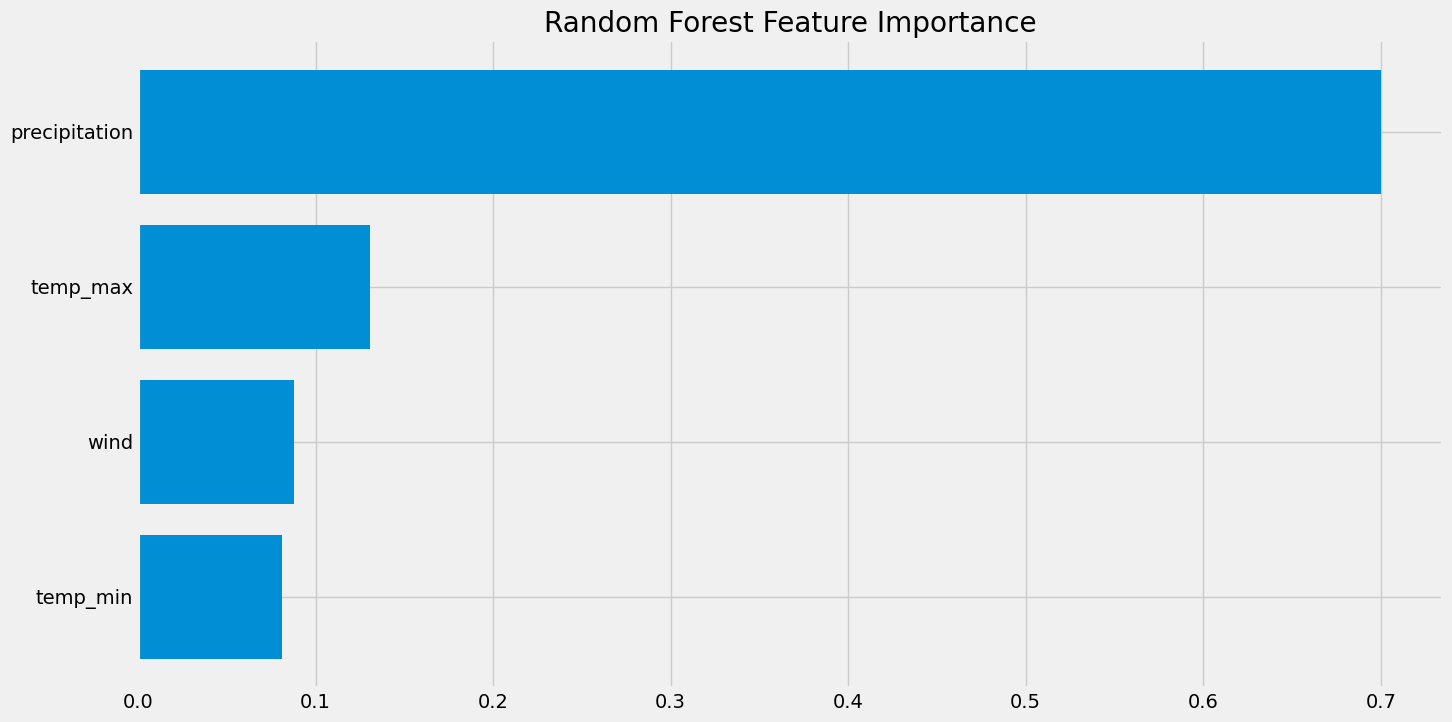

In [46]:
sorted = rf.feature_importances_.argsort()
plt.barh(X_train.columns.values[sorted], rf.feature_importances_[sorted])
plt.title('Random Forest Feature Importance')

# Testing Data Prediction

In [47]:
import joblib

#Export Model RandomForest
# path_file = '/content/drive/MyDrive/data-science/rencana-proyek/1/model.sav'
path_file = 'model/model.sav'
joblib.dump(rf,path_file)

['model/model.sav']

In [48]:
# model = joblib.load('/content/drive/MyDrive/data-science/rencana-proyek/1/model.sav')
model = joblib.load('model/model.sav')
model

RandomForestClassifier()

In [49]:
y_predict = model.predict(X_test)
y_predict[:10]

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 0], dtype=int64)

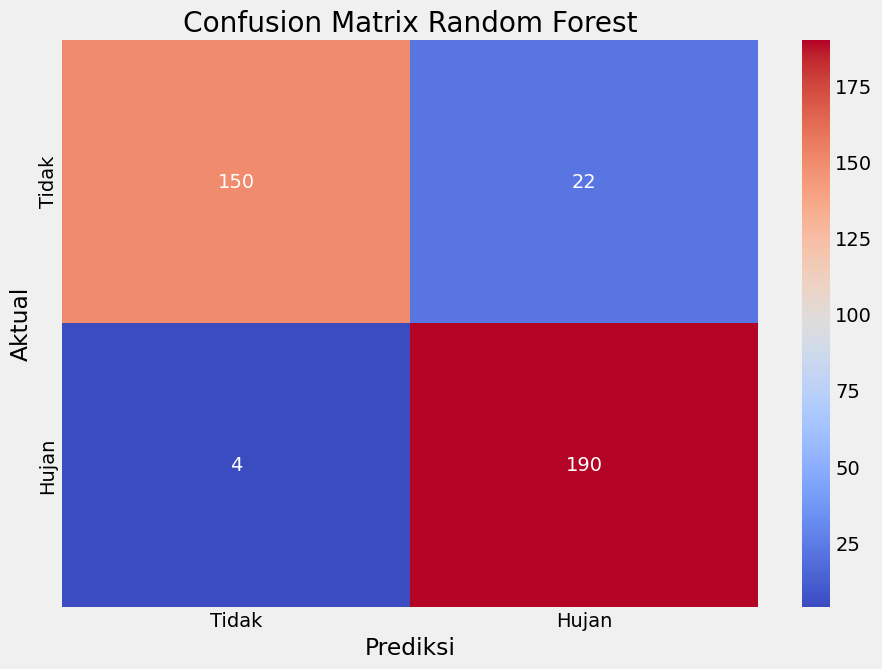

In [50]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_predict)

plt.figure(figsize = (10, 7))
sns.heatmap(cm,annot=True,cmap='coolwarm',fmt='g')
plt.xticks([0.5, 1.5],['Tidak','Hujan'])
plt.yticks([0.5, 1.5],['Tidak','Hujan'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Random Forest')
plt.show()

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print('Best Model Accuracy     : {:.2f}%'.format(accuracy_score(y_test, y_predict)*100))
print('Best Model Precision    : {:.2f}%'.format(precision_score(y_test, y_predict)*100))
print('Best Model Recall       : {:.2f}%'.format(recall_score(y_test, y_predict)*100))
print('Best Model F1-score     : {:.2f}%'.format(f1_score(y_test, y_predict)*100))

Best Model Accuracy     : 92.90%
Best Model Precision    : 89.62%
Best Model Recall       : 97.94%
Best Model F1-score     : 93.60%


# Realtime Prediction

In [52]:
X_train.columns

Index(['precipitation', 'temp_max', 'temp_min', 'wind'], dtype='object')

In [54]:
#Meminta Data pada User
data = []
for col in X_train.columns:
  if(col not in ['','sex']):
    x = float(input('Masukkan data {} : '.format(col)))
    data.append(x)
  else:
    x = input('Masukkan data {} : '.format(col))
    data.append(x)

df1 = pd.DataFrame(columns=X_train.columns)
df1.loc[0] = data

df = df1.copy()

#Melakukan Scaling/Normalization
df[df.columns] = sc.transform(df[df.columns])

hasil = model.predict(df)

In [58]:
df1

0    3.0
Name: wind, dtype: float64

In [ ]:
print(hasil)

In [ ]:
if(hasil==1):
  print('Cuaca Diprediksi Tidak Hujan')
else:
  print('Cuaca Diprediksi Akan Hujan')